In [1]:
# !pip install datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_dataset


# Loading Dataset

data_set = load_dataset('lukebarousse/data_jobs')
df = data_set['train'].to_pandas()

#Data Clean Up
df.job_posted_date = pd.to_datetime(df.job_posted_date)


In [5]:
df_us_software_pivot = pd.read_csv("https://lukeb.co/software_csv",index_col='job_posted_month')

In [6]:
df_us_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [9]:
df_us = df[df['job_country'] == 'United States'].copy() 
df_us['Month'] = df_us['job_posted_date'].dt.month_name()
df_us.reset_index(inplace=True)
df_us_pivot = df_us.pivot_table(index='Month',columns='job_title_short',aggfunc='size')
df_us_pivot


job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
Month,,,,,,,,,,
April,565,40,6049,2801,4867,51,1025,781,991,112
August,903,39,6634,3269,6318,68,1186,903,1515,194
December,648,40,3979,2641,3472,119,601,689,752,212
February,447,24,6124,3060,4956,56,1258,878,1127,90
January,527,36,8494,2655,6915,60,1544,773,1552,114
July,581,39,5201,2570,4876,65,883,747,1095,153
June,446,32,5683,2893,4645,48,1009,812,1033,93
March,438,19,6218,3183,4779,59,1114,829,1150,115
May,279,20,4993,2976,4377,49,839,746,914,90


In [13]:
# df_us.reset_index(inplace=True)
# df_us_pivot = df_us.pivot_table(index='Month',columns='job_title_short',aggfunc='size')
# df_us_pivot
# df_us_pivot.reset_index(inplace=True)

# df_us_pivot['month_no'] = pd.to_datetime(df_us_pivot['Month'], format='%B').dt.month

# df_us_pivot.sort_values('month_no',inplace=True)

# df_us_pivot.drop(columns='month_no',inplace=True)
# df_us_pivot.set_index('Month',inplace=True)

df_us_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
Month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [19]:
df_us_merged = df_us_software_pivot.merge(df_us_pivot ,right_on='Month',left_index=True) 


In [28]:
top5 = df_us_merged.sum().sort_values(ascending=False).head().index.to_list()

top5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

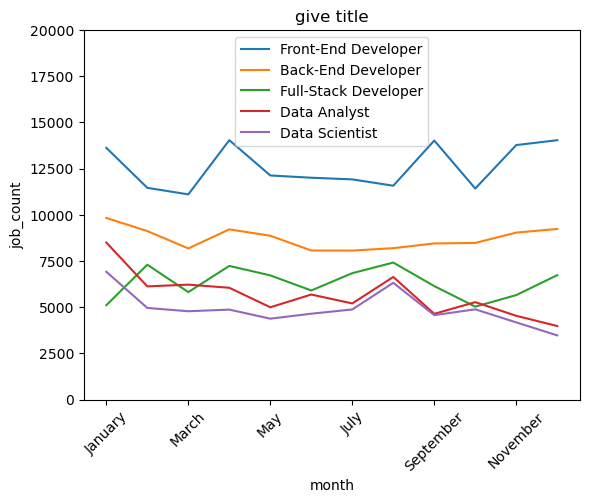

In [35]:
df_us_merged[top5].plot(kind='line')
plt.title('give title')
plt.xlabel('month')
plt.ylabel('job_count')
plt.xticks(rotation=45)
plt.legend()
plt.ylim(0,20000)
plt.show()